### Mercedes-Benz Greener Manufacturing
#### Course-end Project 1

##### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

##### Problem Statement Scenario:
Mercedes-Benz is the leader in the premium car industry.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

We are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

##### Following actions should be performed:

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

In [76]:
#Importing necessary libraries
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [77]:
#Load dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [78]:
#Checking shape of Train and test dataset
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (4209, 378)
Test shape:  (4209, 377)


In [79]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [80]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
#Checking datatypes of columns
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

##### There are 8 columns which are categorical while the rest columns are numeric in nature

In [82]:
#Statistical Analysis
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### We notice all the numeric columns have binary values while some columns have values '0'. The columns with 0 values can be dropped.

In [83]:
#Checking missing values in train dataset
train.isnull().sum().sum()

0

In [84]:
#Checking missing values in test dataset
test.isnull().sum().sum()

0

##### There are no missing values in both train and test dataset

In [85]:
#Checking variance for all the columns.
train.var()

ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [86]:
# Creating a Series for Columns with Variance = 0 
temp = pd.Series(train.var())
temp[temp.values == 0]

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64

##### We will be dropping these columns as they have variance 0 

In [87]:
#Extracting the column names
drop_cols = temp[temp.values == 0].index
drop_cols

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [88]:
#Dropping these columns from both train and test dataset
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)

In [89]:
#Re-checking the shape after dropping columns
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (4209, 366)
Test shape:  (4209, 365)


In [90]:
#Unique values for all columns
train_uni = pd.DataFrame(train.nunique(),columns=['unique'])
train_uni

,unique
ID,4209
y,2545
X0,47
X1,27
X2,44
...,...
X380,2
X382,2
X383,2
X384,2


In [91]:
train_uni[train_uni.unique > 2] #columns having unique values more than 2

,unique
ID,4209
y,2545
X0,47
X1,27
X2,44
X3,7
X4,4
X5,29
X6,12
X8,25


In [92]:
train_uni[train_uni.unique <= 2] #columns having unique values less than and equal to 2

,unique
X10,2
X12,2
X13,2
X14,2
X15,2
...,...
X380,2
X382,2
X383,2
X384,2


##### From the above analysis, we can once again confirm that columns X0 to X8 have categorial data while the rest have binary data

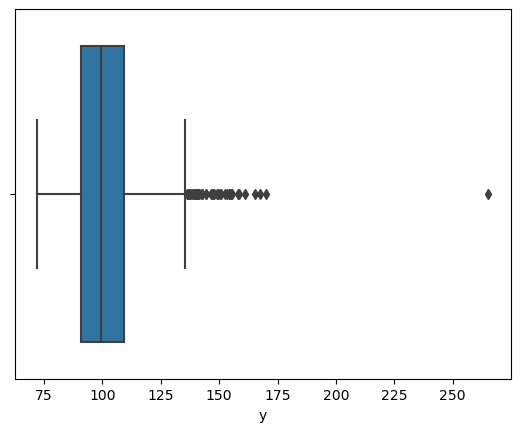

In [93]:
#Checking for outliers in y
sns.boxplot(train.y)
plt.show()

##### we can see one extreme outlier, lets find and drop it

In [94]:
train[train.y > 250]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


In [95]:
train.drop(883, axis=0, inplace = True) #dropping row 883

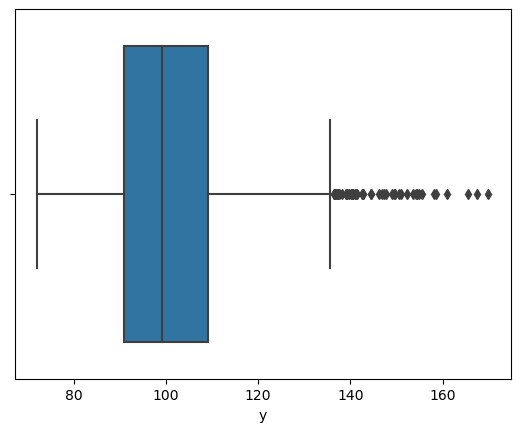

In [96]:
#outliers
sns.boxplot(train.y)
plt.show()

In [97]:
#Using IQR method to find and treat the outliers
Q3 = train.y.quantile(0.75)
Q1 = train.y.quantile(0.25)
IQR = Q3-Q1
upper = Q3 + 1.5 * (IQR)

In [98]:
train[train.y > upper].shape #total outliers

(49, 366)

In [99]:
train[train.y > upper].shape[0]/train.shape[0]*100   #percentage of outliers

1.164448669201521

##### There are in all 49 outliers which amounts to 1.16% of train data. These can be dropped as they are less in number, however lets change the quantile value and investigate further.

In [100]:
#changing qualtile to 80-20
Q3 = train.y.quantile(0.80)
Q1 = train.y.quantile(0.20)
IQR = Q3-Q1
upper = Q3 + 1.5 * (IQR)
train[train.y > upper].shape #total outliers

(26, 366)

##### lets drop these 26 outliers

In [101]:
#outlier indexes
drop_index = train[train.y > upper].index

In [102]:
#dropping outliers
train.drop(drop_index, axis=0, inplace= True)

In [103]:
train.shape

(4182, 366)

##### Applying Label Encoding on categorical columns 

In [104]:
cat_cols = ['X0','X1','X2','X3','X4','X5','X6','X8'] # Categorical columns

In [105]:
#Encoding train dataset
le = LabelEncoder()

train[cat_cols] = train[cat_cols].apply(le.fit_transform)

In [106]:
#encoding Test dataset as well

test[cat_cols] = test[cat_cols].apply(le.fit_transform)

In [107]:
#Splitting X and Y
X = train.drop(['y'], axis=1)
y = train.y

In [108]:
#Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Using PCA technique for dimentionality reduction

In [109]:
#Applying PCA on Train data
pca = PCA(n_components = 0.95) #select components that can explain 95% of variance 
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(4182, 148)

#### Model building using XGBoost

In [110]:
#Applying train test split
train_X, test_X, train_y, test_y = train_test_split(X_pca, y, test_size=0.3)

In [111]:
# fit model on training data
xgb = XGBRegressor()
xgb.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [112]:
print('Train Score: {}'.format(xgb.score(train_X, train_y)))
print('Test Score: {}'.format(xgb.score(test_X, test_y)))   

Train Score: 0.9909645204554739
Test Score: 0.47412190372869023


In [113]:
pred_y = xgb.predict(test_X)

In [114]:
#R2 Score
r2_score(test_y, pred_y)

0.47412190372869023

##### Hyperparameter tuning

In [115]:
#Applying grid search CV
params = {'n_estimators':[30,50,60,80,100,120,150],'max_depth':[2,3,5,6,7,10,15]}
grid_search = GridSearchCV(xgb, params, cv=5, verbose=1)
grid_search.fit(train_X,train_y)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [117]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 80}

In [119]:
#final fit using best parameters
xgb_final = XGBRegressor( n_estimators = 80, max_depth = 2)
xgb_final.fit(train_X,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=80, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [120]:
print('Train Score: {}'.format(xgb_final.score(train_X, train_y)))
print('Test Score: {}'.format(xgb_final.score(test_X, test_y)))   

Train Score: 0.7079516725887907
Test Score: 0.5755541482089632


In [121]:
pred_y = xgb_final.predict(test_X)

In [122]:
#R2 Score
r2_score(test_y, pred_y)

0.5755541482089632

#### Final Prediction on Test data

In [123]:
test.head()
#Note: we have already label encoded our test data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [124]:
#Scaling
test_scaled = scaler.fit_transform(test)

In [126]:
#Applying PCA on Test data
pca = PCA(n_components = 0.95) #select components that can explain 95% of variance 
test_pca = pca.fit_transform(test_scaled)
test_pca.shape

(4209, 148)

In [149]:
#Predicting output
pred_y_test = xgb_final.predict(test_pca)
pred_y_test

array([ 82.97937 ,  94.59973 ,  86.261566, ...,  94.94913 , 101.23412 ,
        98.41841 ], dtype=float32)

In [169]:
#creating dataframe with predicted output
test_df = pd.DataFrame(test.ID, columns=['ID'])
test_df['y'] = pred_y_test
test_df.set_index('ID', inplace=True)

In [170]:
#Final Prediction
test_df

,y
ID,
1,82.979370
2,94.599731
3,86.261566
4,86.161903
5,99.476952
...,...
8410,99.434784
8411,98.049469
8413,94.949127


#### Project Prepared by
Archana Kokate